## Projeto - Machine Learning


Passo 1 - Análise dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

df = pd.read_csv("BitcoinHeistData.csv")

In [3]:
tamanho_df = df.shape
print(f"O dataframe tem o seguinte tamanho {tamanho_df}")
print(df.head(5))

O dataframe tem o seguinte tamanho (2916697, 10)
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLocky  


Paso 1.2 - Análise das variáveis

| Nome    | Tipo   | Descrição |
|---------|--------|-----------|
| address   | string |Endereço do destinátario exclusivo|
| year      | int    |Ano em que foi realizada a transação|
| day       | int    |Dia do ano em que foi realizada a transação|
| length    | int    |Número de mixing rounds - Dificulta o rastreio da fonte da transação através da mistura de bitcoins com outros utilizadores|
| weight    | float  |Referente à diferença entre o número de inputs e o outputs das transações - Pode haver várias inputs para uma única output - Fluxo|
| count     | int    |Conta o número de transações|
| looped    | int    |Conta o número de transações para um endereço através de mais que um caminho|
| neighbors | int    |Número de transações referentes a cada Bitcoin|
| income    | int    |Rendimento recebido no endereço|
| label     | string |Natureza da transição (Ransomware ou legitimo)|


Passo 1.3 - Análise gráfica das variáveis

Número de transações por ano

year
2011    355349
2012    365714
2013    372494
2014    375319
2015    368701
2016    380631
2017    368486
2018    330003
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

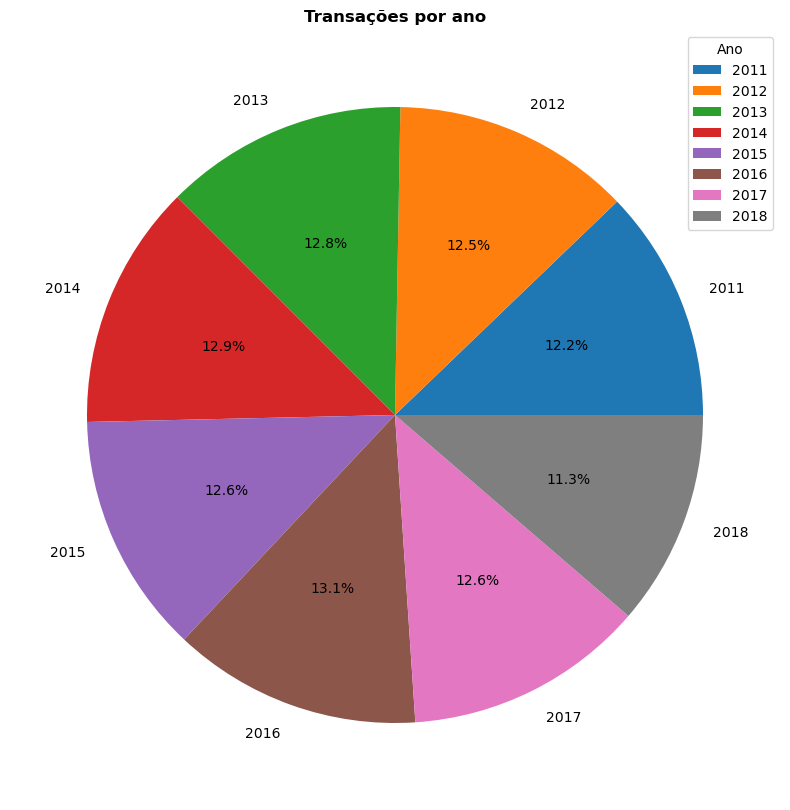

In [4]:
transacoes_por_ano = df["year"].value_counts().sort_index(ascending=True)
print(transacoes_por_ano)
plt.figure(figsize=(10,10))
plt.pie(transacoes_por_ano, labels = transacoes_por_ano.index, autopct = "%1.1f%%" )
plt.title("Transações por ano", weight = 'bold')
plt.legend(title = "Ano", loc = "best")
plt.show

Número de transações por dia

day
1      7494
2      7434
3      7462
4      7526
5      7692
       ... 
361    7039
362    7053
363    7043
364    7058
365    7056
Name: count, Length: 365, dtype: int64


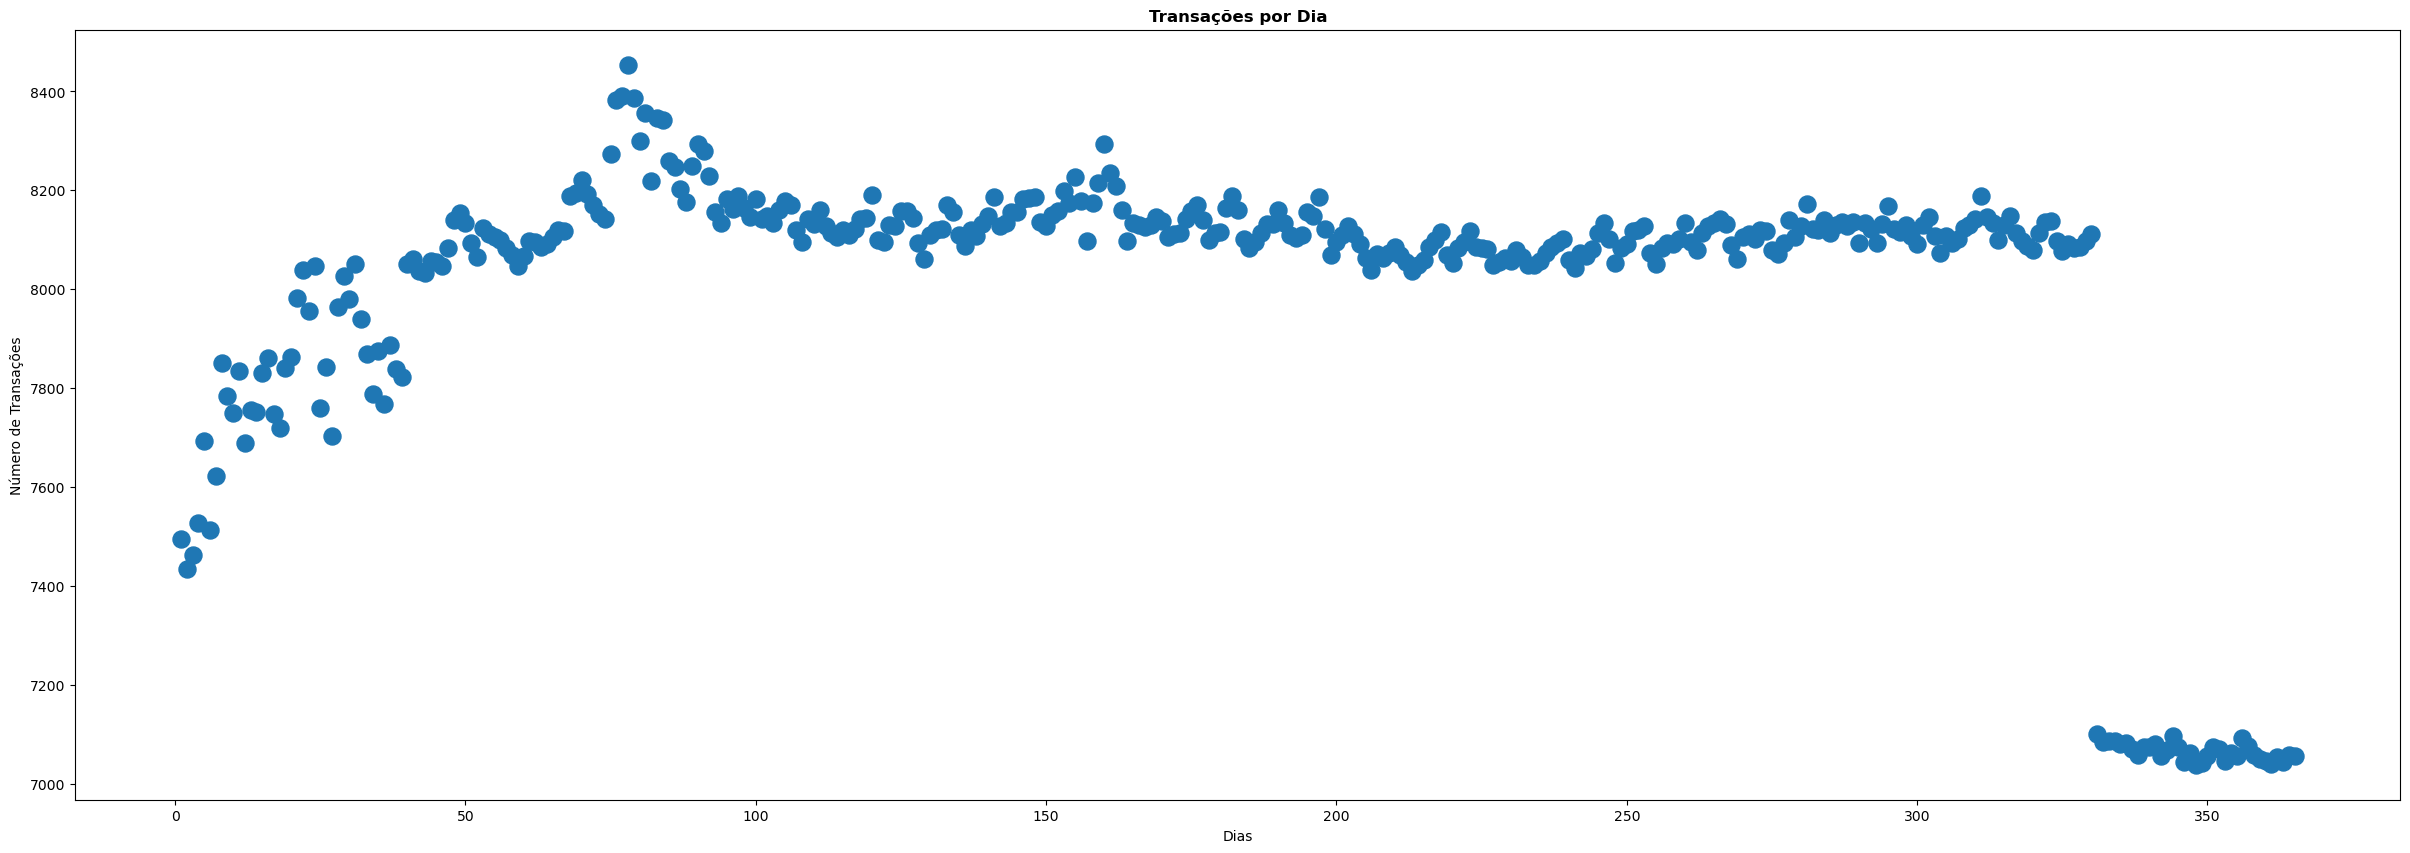

In [5]:
transacoes_por_dia = df["day"].value_counts().sort_index(ascending=True)
print(transacoes_por_dia)
plt.figure(figsize=(30,10))
plt.scatter(transacoes_por_dia.index, transacoes_por_dia.values, s=150)  # 's' define o tamanho dos pontos
plt.title("Transações por Dia", weight='bold')
plt.xlabel("Dias")
plt.ylabel("Número de Transações")
plt.show()

Número de mixing rounds

length
0      708621
2      357209
4      187632
6      127337
8       93188
        ...  
136      6780
138      8182
140     11399
142     19495
144    624842
Name: count, Length: 73, dtype: int64


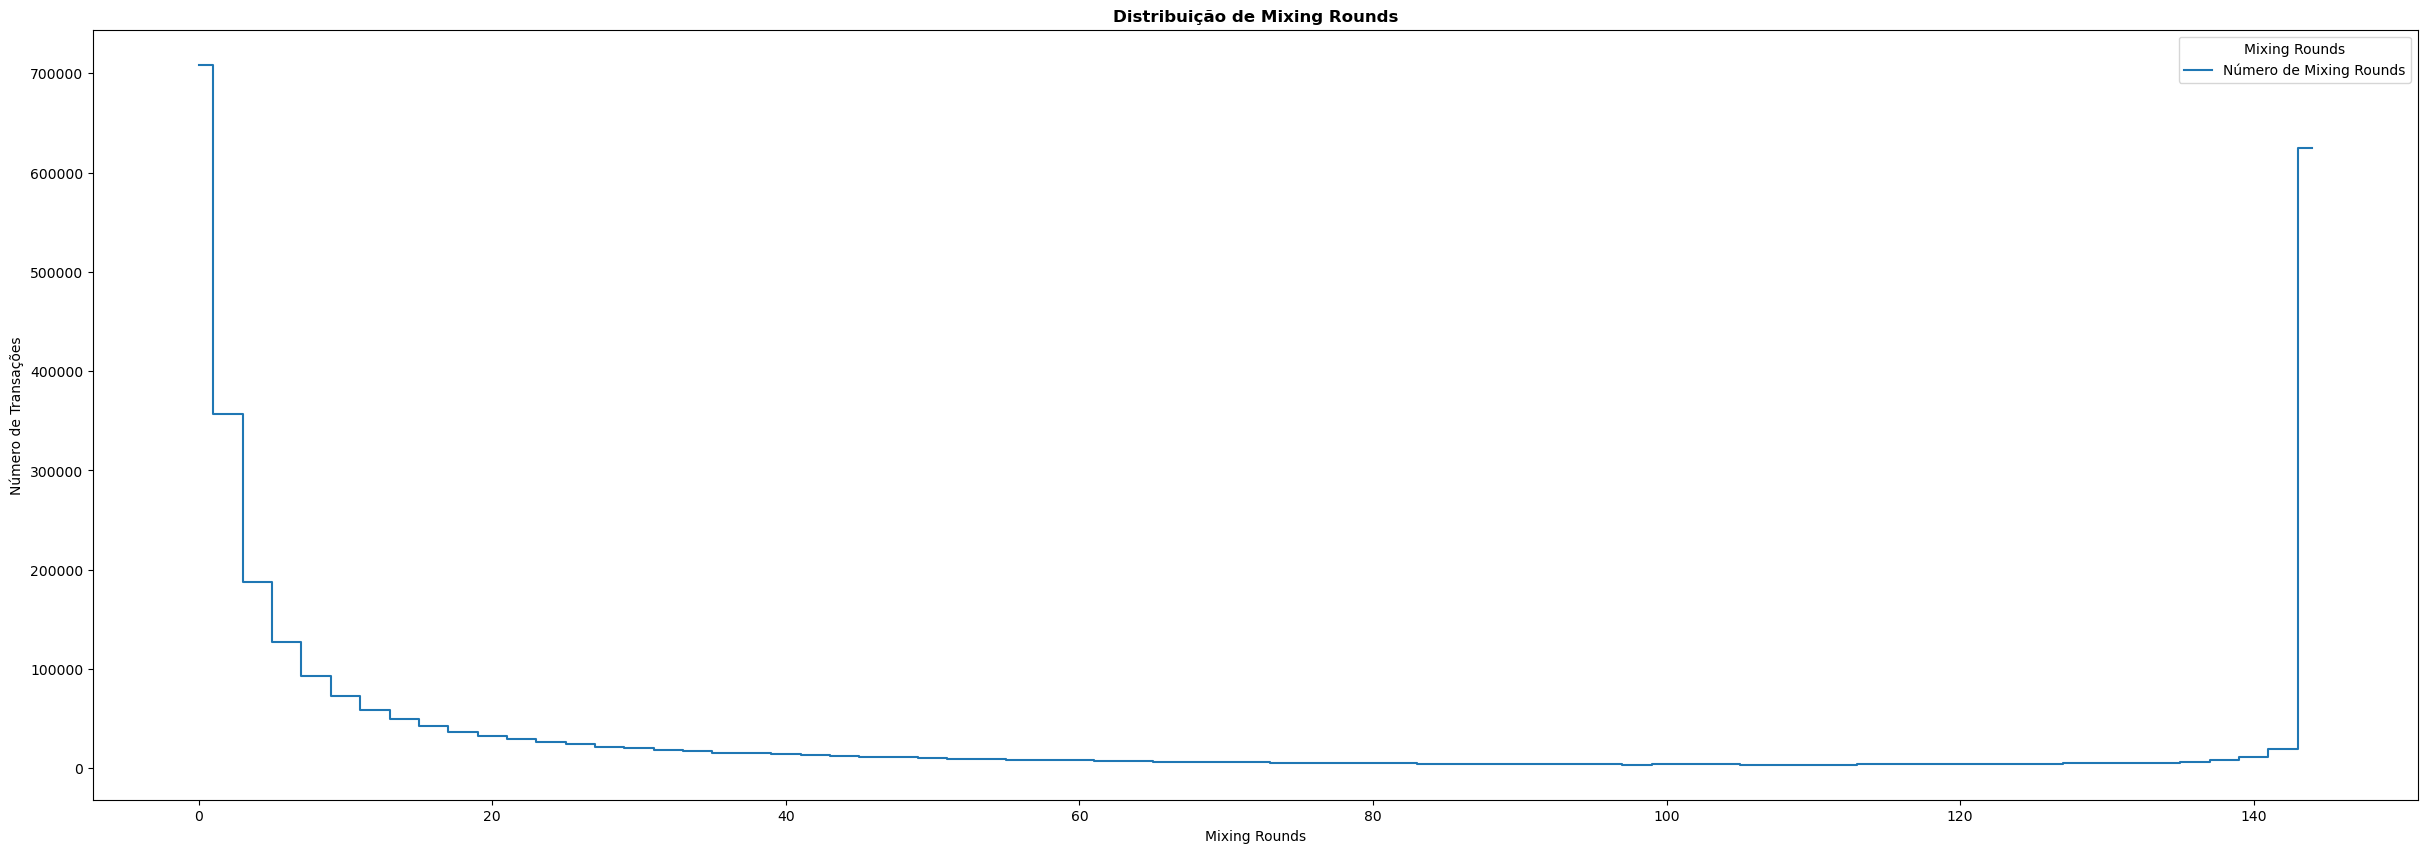

In [6]:
numero_mixing_rounds = df["length"].value_counts().sort_index(ascending=True)
print(numero_mixing_rounds)
plt.figure(figsize=(30, 10))
plt.step(numero_mixing_rounds.index, numero_mixing_rounds.values, where='mid', label="Número de Mixing Rounds")
plt.title("Distribuição de Mixing Rounds", weight='bold')
plt.xlabel("Mixing Rounds")
plt.ylabel("Número de Transações")
plt.legend(title="Mixing Rounds", loc="best")
plt.show()

Count

count
1        1673550
2         149226
3          62376
4          36705
5          24318
          ...   
14493         18
14494         84
14495          5
14496         56
14497          1
Name: count, Length: 11572, dtype: int64


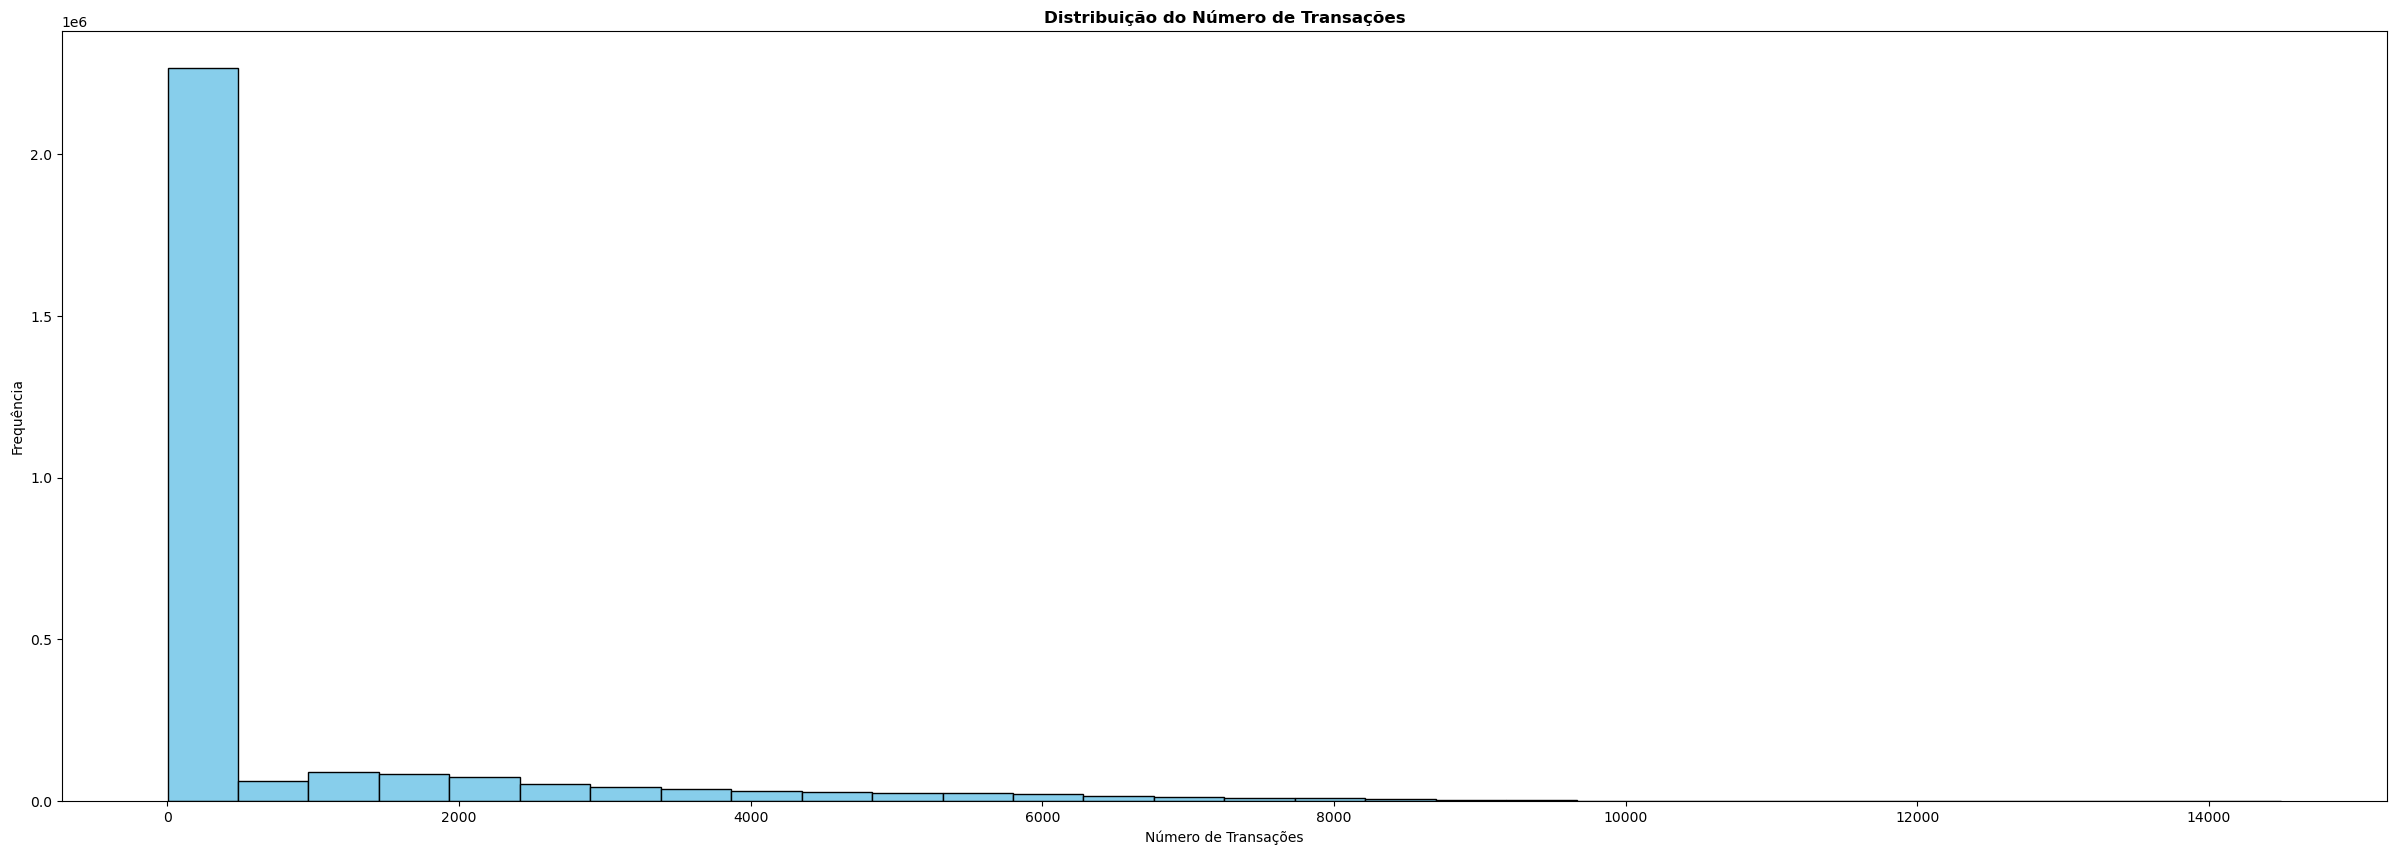

In [7]:
transacoes = df["count"].value_counts().sort_index(ascending=True)
print(transacoes)
plt.figure(figsize=(30, 10))
plt.hist(df['count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Transações', weight='bold')
plt.xlabel('Número de Transações')
plt.ylabel('Frequência')
plt.show()

Weight

weight
3.606469e-94    1
1.420108e-90    1
2.863244e-89    1
8.973914e-88    1
1.825881e-87    1
               ..
1.019849e+03    1
1.804615e+03    1
1.827779e+03    1
1.866717e+03    1
1.943749e+03    1
Name: count, Length: 784927, dtype: int64


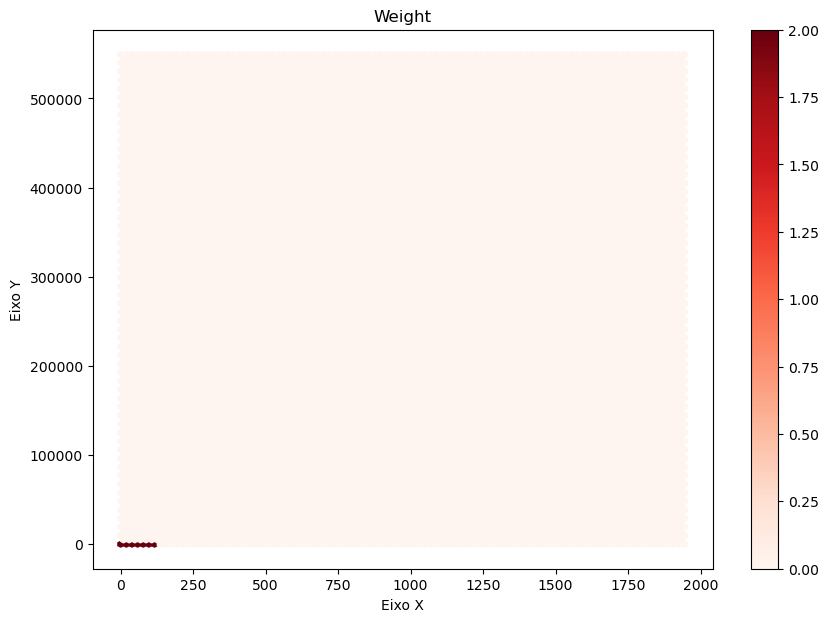

In [8]:
weight = df["weight"].value_counts().sort_index(ascending=True)
print(weight)
plt.figure(figsize=(10,7))
plt.hexbin(weight.index, weight.values, bins=(50, 50), cmap=plt.cm.Reds)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Weight')
plt.colorbar()
plt.show()


Income


income
3.000000e+07    16088
3.000000e+07        7
3.000000e+07        2
3.000001e+07        1
3.000001e+07        1
                ...  
4.967858e+13        1
4.978520e+13        1
4.979763e+13        1
4.982447e+13        1
4.996440e+13        1
Name: count, Length: 1866365, dtype: int64


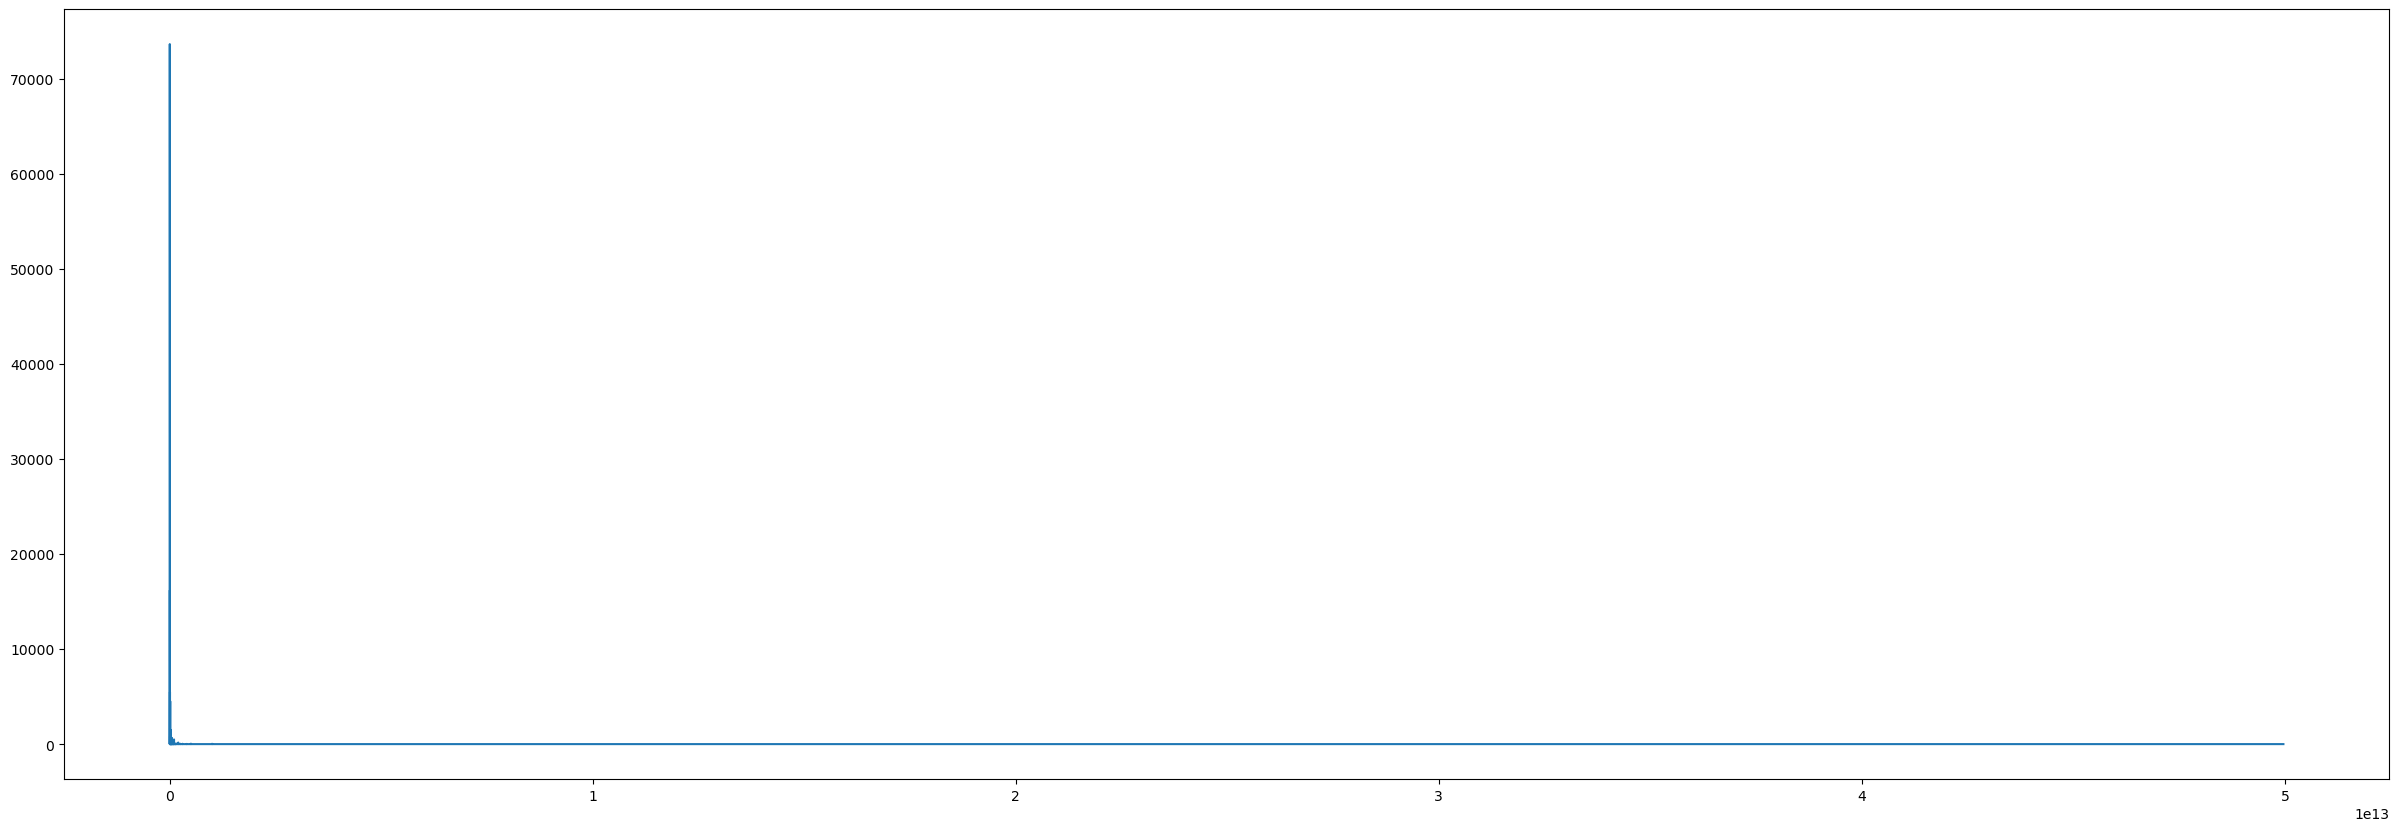

In [9]:
label = df["income"].value_counts().sort_index(ascending=True)
print(label)
plt.figure(figsize=(30,10))
plt.plot(label.index, label.values)
plt.show()

Neighbors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neighbors
1         896972
2        1858284
3          46782
4          55115
5          11497
          ...   
3575           1
3776           1
7589           1
11746          1
12920          1
Name: count, Length: 814, dtype: int64


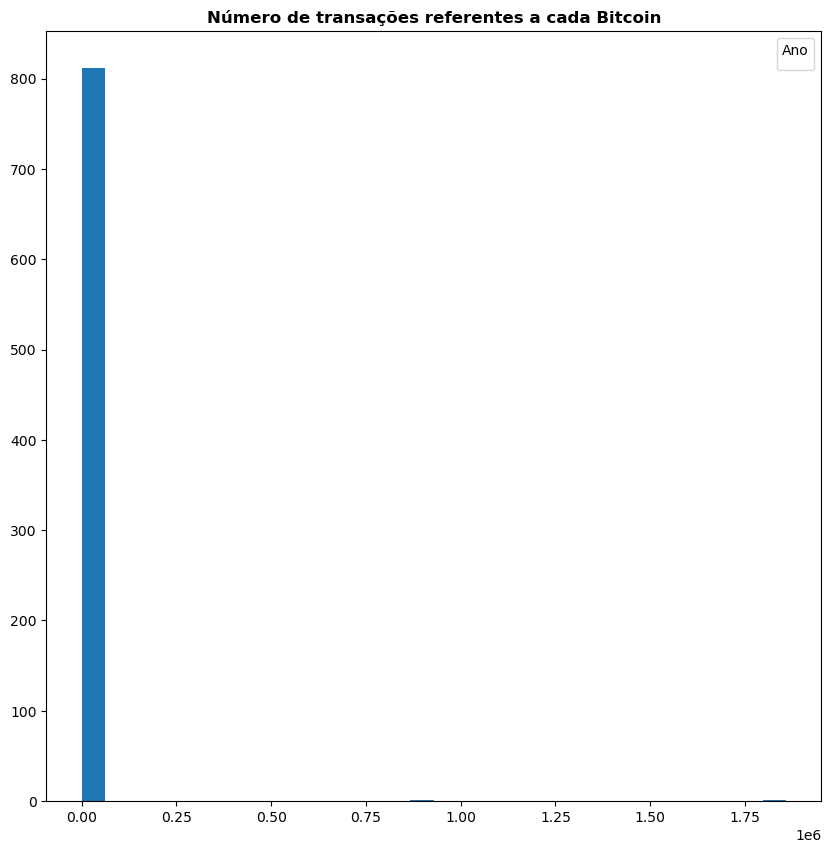

In [10]:
neighbors = df["neighbors"].value_counts().sort_index(ascending=True)
print(neighbors)
plt.figure(figsize=(10,10))
plt.hist(neighbors, bins=30)
plt.title("Número de transações referentes a cada Bitcoin", weight = 'bold')
plt.legend(title = "Ano", loc = "best")
plt.show()

Pré-processamento de dados

In [11]:
null_values = df.isnull().sum()
print("Numero de nulos em cada coluna:\n ", null_values)

Numero de nulos em cada coluna:
  address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [12]:
duplicates = df.duplicated().sum()
print("Numero de duplicados em cada coluna:\n ", duplicates)

Numero de duplicados em cada coluna:
  0


Substituição dos dados de strings em numeros

In [13]:
valores_unicos = df['label'].unique()
print(valores_unicos)

df.replace({'label':{'montrealWannaCry':0, 'montrealDMALockerv3':1,
 'montrealCryptoTorLocker2015':2, 'montrealSamSam':3, 'montrealFlyper':4,
 'montrealNoobCrypt':5, 'montrealDMALocker':6, 'montrealGlobe':7, 'montrealEDA2':8,
 'paduaKeRanger':9, 'montrealVenusLocker':10, 'montrealXTPLocker':11, 'paduaJigsaw':12,
 'montrealGlobev3':13, 'montrealJigSaw':14, 'montrealXLockerv5.0':15,
 'montrealXLocker':16, 'montrealRazy':17, 'montrealCryptConsole':18,
 'montrealGlobeImposter':19, 'montrealSam':20, 'montrealComradeCircle':21,
 'montrealAPT':22, 'white':23, 'pr':24, 'princetonLockyincetonCerber':25, 'princetonCerber':26,
 'princetonLocky':27, 'montrealCryptoLocker':28, 'montrealCryptXXX':29, 'paduaCryptoWall':30}},inplace=True)

#df.drop('adress', axis=1)

['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealXLocker' 'montrealRazy' 'montrealCryptConsole'
 'montrealGlobeImposter' 'montrealSam' 'montrealComradeCircle'
 'montrealAPT' 'white']


Conjuntos de treino e de teste

In [14]:
X = df[['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']]
y = df['label']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.head())
print(y.head())

   year  day  length    weight  count  looped  neighbors       income
0  2017   11      18  0.008333      1       0          2  100050000.0
1  2016  132      44  0.000244      1       0          1  100000000.0
2  2016  246       0  1.000000      1       0          2  200000000.0
3  2016  322      72  0.003906      1       0          2   71200000.0
4  2016  238     144  0.072848    456       0          1  200000000.0
0    26
1    27
2    26
3    26
4    27
Name: label, dtype: int64


Criação e treino do modelo

In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Avaliação e classificação do modelo

In [16]:

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

c:\Users\freit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\freit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\freit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\freit\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.07      0.07      0.07       112
           2       0.12      0.12      0.12        16
           3       0.08      0.05      0.06        20
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00       121
           6       0.03      0.05      0.04        63
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         

Visualização da Arvore

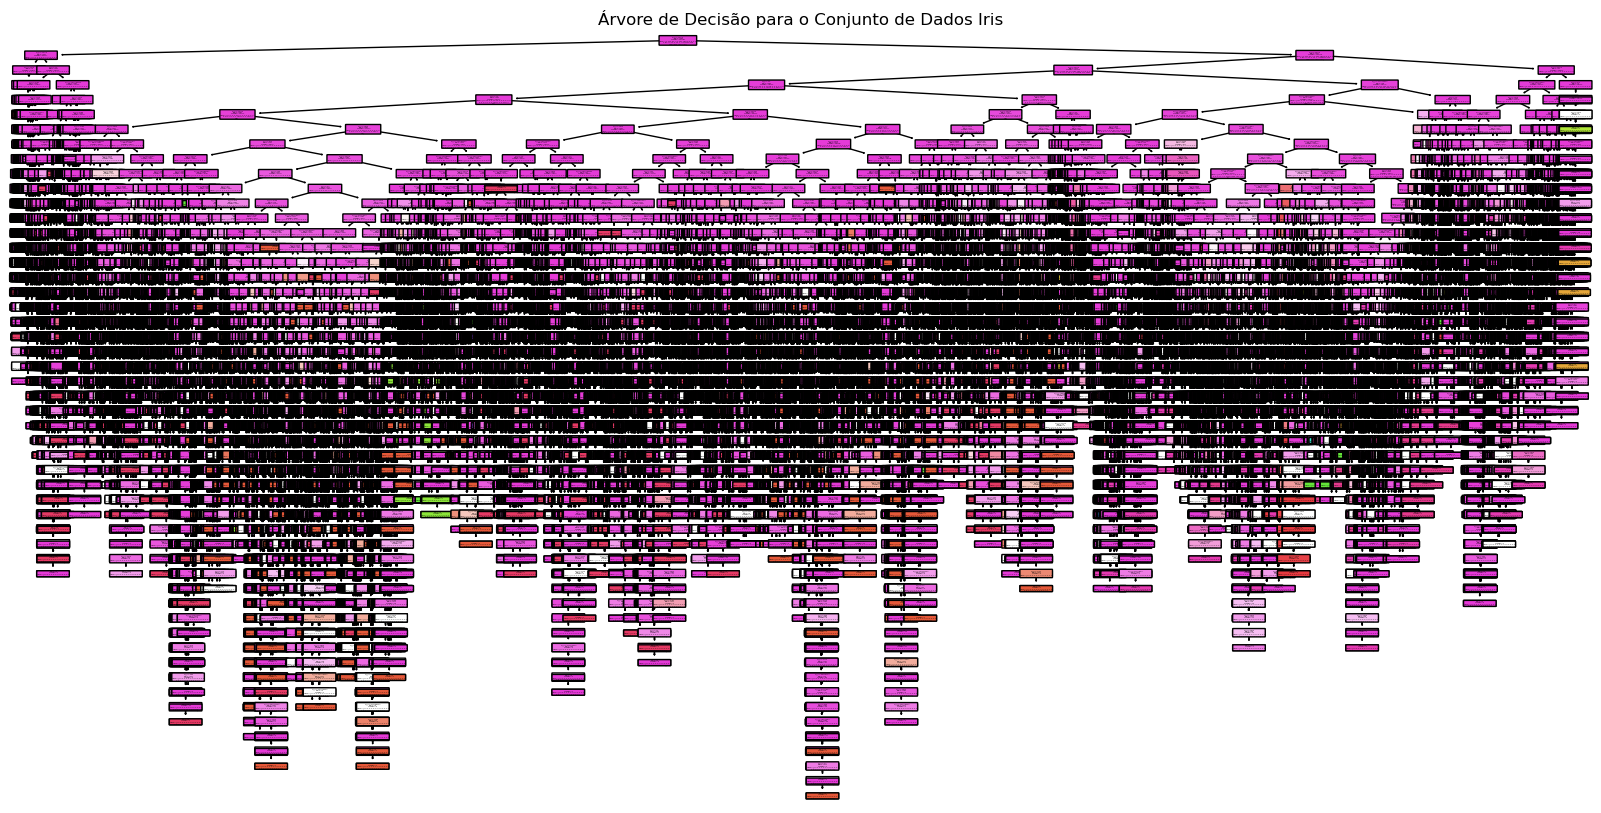

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, rounded=True, proportion=False)
plt.title("Árvore de Decisão para o Conjunto de Dados Iris")
plt.show()